<a href="https://colab.research.google.com/github/Kim-Jeong-Ju/AI_Modeling_NLP/blob/main/Text_Pre_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Packages and Modules Importation**

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

!pip install kss
!pip install konlpy

from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import TreebankWordTokenizer
from nltk.tokenize import sent_tokenize
from nltk.tokenize import RegexpTokenizer

from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.corpus import stopwords

from konlpy.tag import Okt, Kkma

import kss
import re

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

from collections import Counter
from nltk import FreqDist

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42.4 MB 1.2 MB/s 
     |████████████████████████████████| 131 kB 46.7 MB/s 
  Created wheel for kss: filename=kss-3.6.4-py3-none-any.whl size=42448613 sha256=83dc51046526a5945ccb7180f1815b6f4256773c7c052d58fc3f53ca7a7e19c6
  Stored in directory: /root/.cache/pip/wheels/32/53/7c/76bdf098c2a6c5cd4c4c29648da30ad4793d604314b2aeb26f
Successfully built kss
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 453 kB 47.5 MB/s 


# **Tokenization, 토큰화**  


---

**토큰화(Tokenization) :** 주어진 Corpus(말뭉치)에서 토큰(token)이라 불리는 단위로 나누는 작업, 상황에 따라 상이하나 일반적으로 의미 있는 단위로 토큰을 정의  
> - **단어 토큰화, Word Tokenization**  
> - **문장 토큰화, Sentence Tokenization**  
> cf) 말뭉치(단수형 Corpus, 복수형 Corpora) : 자연 언어 연구를 위해 특정한 목적을 갖고 표본을 추출한 집합

## **Word Tokenization, 단어 토큰화**  
토큰의 기준을 **단어**로 하는 경우, 단어(word)는 단어 외에도 단어구, 의미를 갖는 문자열로도 간주되기도 함  
> ex) Input text로부터 온점(.), 반점(,), 물음표(?), 느낌표(!), 세미콜론(;), 콜론(:) 등의 구두점(punctuation)과 같은 문자는 제외시키는 간단한 단어 토큰화 작업  
>  
> *단어 토큰화 관련 packages*  
> `from nltk.tokenize import word_tokenize`  
> `from nltk.tokenize import WordPunctTokenizer`  
> `from nltk.tokenize import TreebankWordTokenizer`  
> `from tensorflow.keras.preprocessingtext import text_to_word_sequence`

In [ ]:
## Word Tokenization in English

sample_text = "Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."
sample_treebank_text = "Starting a home-based restaurant may be an ideal. it doesn't have a food chain or restaurant of their own."

sample_word_tkn1 = word_tokenize(sample_text)
print("======= word_tokenize() 함수를 통한 단어 토큰화 =======")
print(sample_word_tkn1)
print()

sample_word_tkn2 = WordPunctTokenizer().tokenize(sample_text)
print("======= WordPunctTokenizer Class를 통한 단어 토큰화 =======")
print(sample_word_tkn2)
print()

sample_word_tkn3 = text_to_word_sequence(sample_text)
print("======= text_to_word_sequence() 함수를 통한 단어 토큰화 =======")
print(sample_word_tkn3)
print()

sample_treebank_tkn = TreebankWordTokenizer().tokenize(sample_treebank_text)
print("======= TreebankWordTokenizer Class를 통한 단어 토큰화 =======")
print(sample_treebank_tkn)

======= word_tokenize() 함수를 통한 단어 토큰화 =======
['Do', "n't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr.', 'Jone', "'s", 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']

======= WordPunctTokenizer Class를 통한 단어 토큰화 =======
['Don', "'", 't', 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr', '.', 'Jone', "'", 's', 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']

======= text_to_word_sequence() 함수를 통한 단어 토큰화 =======
["don't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', 'mr', "jone's", 'orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']

======= TreebankWordTokenizer Class를 통한 단어 토큰화 =======
['Starting', 'a', 'home-based', 'restaurant', 'may', 'be', 'an', 'ideal.', 'it', 'does', "n't", 'have', 'a', 'food', 'chain', 'or', 'restaurant', 'of', 'their', 'own', '.']


## **Sentence Tokenization, 문장 토큰화**  
- **Corpus 내에서 문장 단위로 구분**하는 작업, 문장 분류(Sentence Segmentation)이라고도 함  
- **한국어 문장 토큰화 :** 영어와 달리 띄어쓰기만으로 토큰화 하기에 부족, 한국어는 영어와 달리 **교착어**의 특성을 갖기 때문, 한국어의 경우 띄어쓰기를 잘 안하는 경우도 있음  
- 품사 태깅(POS, Part-Of-Speech Tagging) : 단어 토큰화 과정에서 각 단어가 어떤 품사로 쓰였는지 구분하는 작업  
>  
> *문장 토큰화 및 품사 태깅 관련 packages*  
> `from nltk.tokenize import sent_tokenize`  
> `import kss`  
> `from nltk.tag import pos_tag`  
> `from konlpy.tag import Okt, Kkma, Mecab, Komoran, Hannanum`

In [ ]:
## Sentence Tokenization in English

sample_text1 = "His barber kept his word. But keeping such a huge secret to himself was driving him crazy. Finally, the barber went up a mountain and almost to the edge of a cliff. He dug a hole in the midst of some reeds. He looked about, to make sure no one was near."
sample_text2 = "I am actively looking for Ph.D. students. and you are a Ph.D student."

sample_sent_tkn1 = sent_tokenize(sample_text1)
print("======= sent_tokenize() 함수를 통한 문장 토큰화 1 =======")
print(sample_sent_tkn1)
print()

sample_word_tkn2 = sent_tokenize(sample_text2)
print("======= sent_tokenize() 함수를 통한 문장 토큰화 2 =======")
print(sample_word_tkn2)

======= sent_tokenize() 함수를 통한 문장 토큰화 1 =======
['His barber kept his word.', 'But keeping such a huge secret to himself was driving him crazy.', 'Finally, the barber went up a mountain and almost to the edge of a cliff.', 'He dug a hole in the midst of some reeds.', 'He looked about, to make sure no one was near.']

======= sent_tokenize() 함수를 통한 문장 토큰화 2 =======
['I am actively looking for Ph.D. students.', 'and you are a Ph.D student.']


In [ ]:
## POS(Part-Of-Speech) Tagging in English by pos_tag

sample_text = "I am actively looking for Ph.D. students. and you are a Ph.D student."
sample_text_tkn = word_tokenize(sample_text)
sample_pos_tag = pos_tag(sample_text_tkn)

print("======= 단어 토큰화 =======")
print(sample_text_tkn)
print()

print("======= 품사 태깅 =======")
print(sample_pos_tag)

======= 단어 토큰화 =======
['I', 'am', 'actively', 'looking', 'for', 'Ph.D.', 'students', '.', 'and', 'you', 'are', 'a', 'Ph.D', 'student', '.']

======= 품사 태깅 =======
[('I', 'PRP'), ('am', 'VBP'), ('actively', 'RB'), ('looking', 'VBG'), ('for', 'IN'), ('Ph.D.', 'NNP'), ('students', 'NNS'), ('.', '.'), ('and', 'CC'), ('you', 'PRP'), ('are', 'VBP'), ('a', 'DT'), ('Ph.D', 'NNP'), ('student', 'NN'), ('.', '.')]


In [ ]:
## Sentence Tokenization in Korean

sample_text = "딥러닝 자연어 처리가 재미있기는 합니다. 그런데 문제는 영어보다 한국어로 할 때 너무 어렵습니다. 이제 해보면 알걸요?"

sample_text_kss = kss.split_sentences(sample_text)
print(sample_text_kss)

['딥러닝 자연어 처리가 재미있기는 합니다.', '그런데 문제는 영어보다 한국어로 할 때 너무 어렵습니다.', '이제 해보면 알걸요?']


In [ ]:
## POS(Part-Of-Speech) Tagging in Korean by OKT

okt = Okt()     # Okt : Open Korea Text, 한국어 자연어 처리를 위한 형태소 분석기 Class

sample_text = "열심히 코딩한 당신, 연휴에는 여행을 가봐요."

print("======= OKT 형태소 분석 =======")
print(okt.morphs(sample_text))              # 형태소를 추출하는 함수
print()

print("======= OKT 품사 태깅 =======")
print(okt.pos(sample_text))                 # 한국어 품사를 태깅하는 함수
print()

print("======= OKT 명사 추출 =======")
print(okt.nouns(sample_text))               # 명사를 추출하는 함수

======= OKT 형태소 분석 =======
['열심히', '코딩', '한', '당신', ',', '연휴', '에는', '여행', '을', '가봐요', '.']

======= OKT 품사 태깅 =======
[('열심히', 'Adverb'), ('코딩', 'Noun'), ('한', 'Josa'), ('당신', 'Noun'), (',', 'Punctuation'), ('연휴', 'Noun'), ('에는', 'Josa'), ('여행', 'Noun'), ('을', 'Josa'), ('가봐요', 'Verb'), ('.', 'Punctuation')]

======= OKT 명사 추출 =======
['코딩', '당신', '연휴', '여행']



In [ ]:
## POS(Part-Of-Speech) Tagging in Korean by KKMA

kkma = Kkma()       # KKMA(꼬꼬마) : 한국어 자연어 처리를 위한 형태소 분석기 Class

sample_text = "열심히 코딩한 당신, 연휴에는 여행을 가봐요."

print("======= KKMA 형태소 분석 =======")
print(kkma.morphs(sample_text))              # 형태소를 추출하는 함수
print()

print("======= KKMA 품사 태깅 =======")
print(kkma.pos(sample_text))                 # 한국어 품사를 태깅하는 함수
print()

print("======= KKMA 명사 추출 =======")
print(kkma.nouns(sample_text))               # 명사를 추출하는 함수

======= KKMA 형태소 분석 =======
['열심히', '코딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '가보', '아요', '.']

======= KKMA 품사 태깅 =======
[('열심히', 'MAG'), ('코딩', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('당신', 'NP'), (',', 'SP'), ('연휴', 'NNG'), ('에', 'JKM'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('가보', 'VV'), ('아요', 'EFN'), ('.', 'SF')]

======= KKMA 명사 추출 =======
['코딩', '당신', '연휴', '여행']



# **Cleaning and Normalization, 정제와 정규화**  


---

- **정제(Cleaning) :** 갖고 있는 Corpus로부터 Noise data를 제거
- **정규화(Normalization) :** 표현 방법이 다른 단어들을 통합시켜 같은 단어로 만듦

## **Cleaning, 정제**  
> **불필요한 단어의 제거 :** 등장 빈도가 적은 언어 or 길이가 짧은 단어  
> **불용어(Stopword)**

## **Normalization, 정규화**  
> 규칙에 기반한 표기가 다른 언어들의 통합  
> 대소문자 통합  
> **어간 추출(Stemming)**과 **표제어 추출(Lemmatization)**

# **Lemmatization and Stemming, 표제어 추출과 어간 추출**

## **Lemmatization, 표제어 추출**  


---

- **표제어(Lemma) :** 기본 사전형 단어, 단어들이 다른 형태를 갖더라도 **그 뿌리 단어를 찾아 단어의 갯수를 줄일 수 있는지** 판단
- 표제어 추출하는 방법 : 단어의 **형태학적 Parsing**을 먼저 진행  
> *cf) 형태학(Morphology) : 형태소로부터 단어들을 만들어가는 학문*  
> *cf) 형태학적 Parsing : 단어의 **어간과 접사를 분리**하는 작업*   
> *형태소의 종류 : 어간(stem), 접사(affix)*  
>  
> *표제어 추출 관련 packages*  
> `from nltk.stem import WordNetLemmatizer`

In [ ]:
## Lemmatization

lemmatizer = WordNetLemmatizer()

words = ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
word_lemt = [lemmatizer.lemmatize(word) for word in words]

print("======= Lemmatization 전 =======")
print(words)
print("======= Lemmatization 후 =======")
print(word_lemt)

======= Lemmatization 전 =======
['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
======= Lemmatization 후 =======
['policy', 'doing', 'organization', 'have', 'going', 'love', 'life', 'fly', 'dy', 'watched', 'ha', 'starting']


## **Stemming, 어간 추출**  


---

- 어간 추출은 형태학적 분석을 단순화한 version
- 정해진 규칙만 보고 단어의 어미를 자르는 어림짐작의 작업  
- 섬세한 작업이 아니기 때문에 어간 추출로 도출되는 단어는 사전에 존재하지 않는 단어일 수 있음  
>  
> *어간 추출 관련 packages*  
> `from nltk.stem import PorterStemmer`  
> `from nltk.stem import LancasterStemmer`  

In [ ]:
## PorterStemmer VS LancasterStemmer

porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()

sentence = "This was not the map we found in Billy Bones's chest, but an accurate copy, complete in all things--names and heights and soundings--with the single exception of the red crosses and the written notes."
sentence_tkn = word_tokenize(sentence)
sentence_porter_stem = [porter_stemmer.stem(word) for word in sentence_tkn]
sentence_lancaster_stem = [lancaster_stemmer.stem(word) for word in sentence_tkn]

print("======= Stemming 전 =======")
print(sentence_tkn)
print()

print("======= Porter Stemming =======")
print(sentence_porter_stem)
print("======= Lancaster Stemming =======")
print(sentence_lancaster_stem)

======= Stemming 전 =======
['This', 'was', 'not', 'the', 'map', 'we', 'found', 'in', 'Billy', 'Bones', "'s", 'chest', ',', 'but', 'an', 'accurate', 'copy', ',', 'complete', 'in', 'all', 'things', '--', 'names', 'and', 'heights', 'and', 'soundings', '--', 'with', 'the', 'single', 'exception', 'of', 'the', 'red', 'crosses', 'and', 'the', 'written', 'notes', '.']

======= Porter Stemming =======
['thi', 'wa', 'not', 'the', 'map', 'we', 'found', 'in', 'billi', 'bone', "'s", 'chest', ',', 'but', 'an', 'accur', 'copi', ',', 'complet', 'in', 'all', 'thing', '--', 'name', 'and', 'height', 'and', 'sound', '--', 'with', 'the', 'singl', 'except', 'of', 'the', 'red', 'cross', 'and', 'the', 'written', 'note', '.']
======= Lancaster Stemming =======
['thi', 'was', 'not', 'the', 'map', 'we', 'found', 'in', 'bil', 'bon', "'s", 'chest', ',', 'but', 'an', 'acc', 'cop', ',', 'complet', 'in', 'al', 'thing', '--', 'nam', 'and', 'height', 'and', 'sound', '--', 'with', 'the', 'singl', 'exceiv', 'of', 'the', 

# **Stopword, 불용어**  


---

- I, my, me, over, 조사, 접미사와 같은 단어들은 문장에서 자주 등장하나 실제 의미 분석에는 기여하는 바가 없음  
- 위와 같은 단어를 **불용어(Stopword)**라고 함  
> *cf) 한국어의 불용어를 제거하는 경우, KoNLPy package의 Okt와 같은 classd의 morphs() 함수로 형태소 분석 후, Stopwords는 미리 배열로 직접 제작하여 제거*
>  
> *불용어 관련 packages*  
> `from nltk.corpus import stopwords`  

In [ ]:
## Stopword in English

stop_word_list = stopwords.words('english')

print("불용어 갯수 = ", len(stop_word_list))
print("불용어 예시 10개 = ", stop_word_list[:10])
print()

sample_sent = "Family is not an important thing. It's everything."
stop_words = set(stopwords.words('english'))
word_tkn = word_tokenize(sample_sent)

result = []
for word in word_tkn:
  if word not in stop_words:
    result.append(word)

print("불용어 제거 전 = ", word_tkn)
print("불용어 제거 후 = ", result)

불용어 갯수 =  179
불용어 예시 10개 =  ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

불용어 제거 전 =  ['Family', 'is', 'not', 'an', 'important', 'thing', '.', 'It', "'s", 'everything', '.']
불용어 제거 후 =  ['Family', 'important', 'thing', '.', 'It', "'s", 'everything', '.']


In [ ]:
## Stopword in Korean

okt = Okt()

sample_sent = "고기를 아무렇게나 구우려고 하면 안돼. 고기라고 다 같은 게 아니거든. 예컨데 삼겹살을 구울 때는 중요한게 있지."

stop_words = "를 아무렇게나 구 우려 고 안 돼 같은 게 구울 때 는"
stop_words = set(stop_words.split(" "))
word_tkn = okt.morphs(sample_sent)

result = [word for word in word_tkn if word not in stop_words]

print("불용어 제거 전 = ", word_tkn)
print("불용어 제거 후 = ", result)

불용어 제거 전 =  ['고기', '를', '아무렇게나', '구', '우려', '고', '하면', '안', '돼', '.', '고기', '라고', '다', '같은', '게', '아니거든', '.', '예컨데', '삼겹살', '을', '구울', '때', '는', '중요한게', '있지', '.']
불용어 제거 후 =  ['고기', '하면', '.', '고기', '라고', '다', '아니거든', '.', '예컨데', '삼겹살', '을', '중요한게', '있지', '.']


# **Regular Expression, 정규 표현식**  


---


>  
> ***정규 표현식 관련 packages***  
> `from nltk.tokenize import RegexpTokenizer`  
> `import re`

## **정규 표현식 특수문자 관련**  
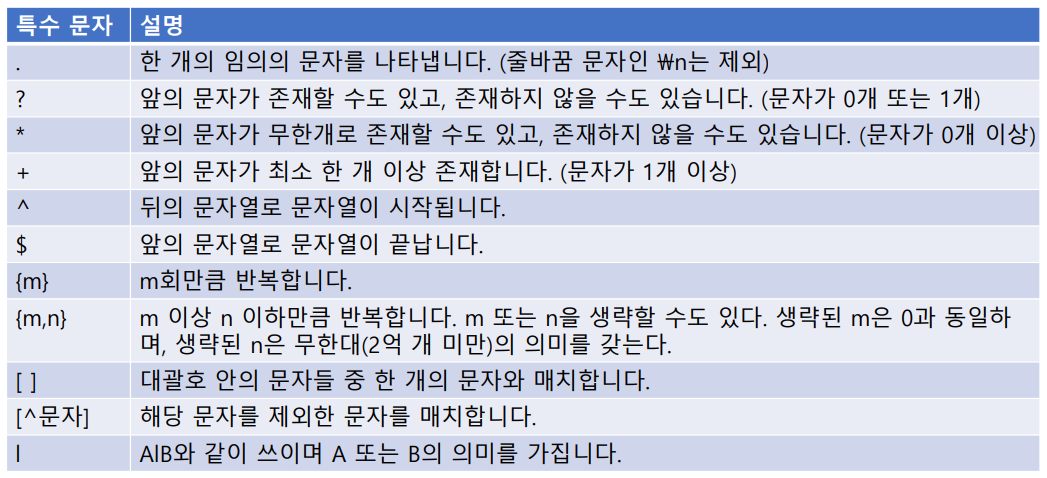

## **정규 표현식 문자 규칙 관련**  
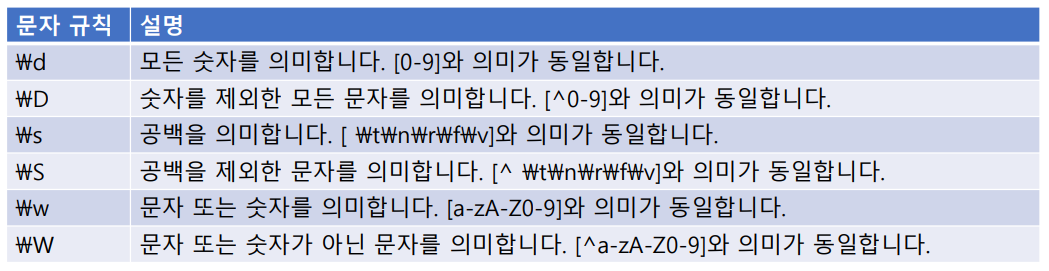

## **정규 표현식 모듈 함수 관련**  
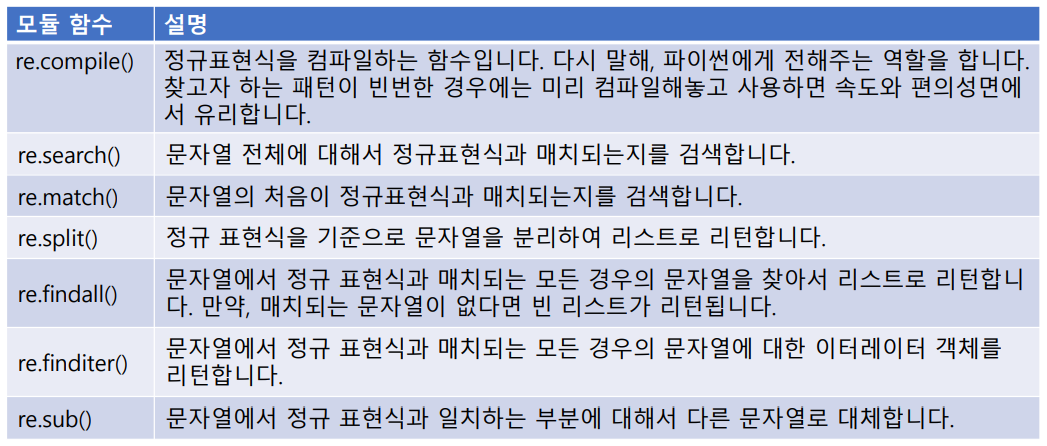

In [ ]:
## 정규 표현식을 이용한 Tokenization

text = "Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop"
reg_token1 = RegexpTokenizer("[\w]+")             # 문자 혹은 숫자 뭉치 토큰화
reg_token2 = RegexpTokenizer("\s+", gaps=True)    # 공백 기준 토큰화

print(reg_token1.tokenize(text))
print()
print(reg_token2.tokenize(text))

['Don', 't', 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', 'Mr', 'Jone', 's', 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']

["Don't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name,', 'Mr.', "Jone's", 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']


In [ ]:
## Text Preprocessing시 길이가 짧은 단어를 삭제하는 데에 정규 표현식을 사용함

text = "I was wondering if anyone out there could enlighten me on this car."

shortword = re.compile(r'\W*\b\w{1,2}\b')
print(shortword.sub("", text))

 was wondering anyone out there could enlighten this car.


In [ ]:
## 정규 표현식을 사용한 주민등록번호 뒷자리 * 처리

data = """
  park 800905-1049118
  kim 700905-1059119
"""

result = []                                   # 일반적인 파이썬 문법을 사용한 경우 -> 코드의 길이가 길어짐

for line in data.split("\n"):
  word_result = []
  for word in line.split(" "):
    if len(word) == 14 and word[:6].isdigit() and word[7:].isdigit():
      word = word[:6] + "-" + "*******"
    word_result.append(word)
  result.append(" ".join(word_result))

print("\n".join(result))

pat = re.compile("(\d{6})[-]\d{7}")           # 정규 표현식을 사용한 경우 -> 가독성이 좋아짐
print(pat.sub("\g<1>-*******", data))


  park 800905-*******
  kim 700905-*******



## **Match 객체의 method**  
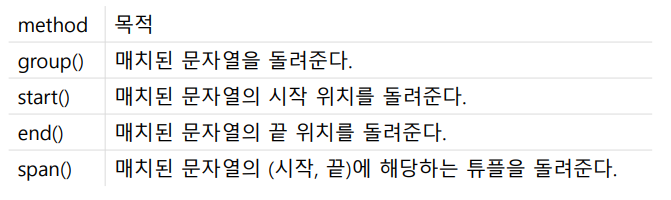

## **Compile Options**  
- DOTALL(S) : 온점(.)이 줄바꿈 문자를 포함하여 모든 문자와 매치할 수 있도록 함
- IGNORECASE(I) : 대소문자에 관계 없이 match할 수 있도록 함
- MULTILINE(M) : 여러줄과 매치할 수 있도록 함 -> ^, $ 메타문자의 사용과 관계 있음
- VERBOSE(X) : Verbose 모드를 사용할 수 있도록 함 -> 정규식을 보기 편하게 만듦, 주석 사용 가능


## **Meta Character, 메타 문자**  
원래 그 문자가 가진 뜻이 아닌 특별한 용도로 사용하는 문자 -> . ^ $ + ? {} [] \ | () 등이 해당

In [ ]:
## |(OR의 의미) -> A|B = A or B

p = re.compile('Crow|Servo')
m = p.match('CrowHello')
print(m)


## \b : 단어 구분자(Word Boundary), 보통 단어는 White space에 의해 구분, \B는 \b와 정반대의 의미(White space로 구분된 단어가 아닌 경우에만 해당)

p = re.compile(r"\bclass\b")
print(p.search("no class at all"))

<re.Match object; span=(0, 4), match='Crow'>
<re.Match object; span=(3, 8), match='class'>


## **Grouping, 그룹핑**  
grouping을 만들어주는 메타 문자 : ()  
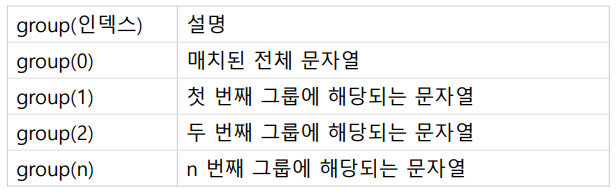

In [ ]:
p = re.compile("(ABC)+")
m = p.search("ABCABCABC OK?")
print(m)
print(m.group())
print()


p = re.compile(r"(\w+)\s+(\d+[-]\d+[-]\d+)")                # 총 2개의 grouping 존재 : 이름 group + 전화번호 group
m = p.search("park 010-1234-5678")
print(m)
print(m.group(1))
print(m.group(2))
print()


p = re.compile(r"(\b\w+)\s+\1")                             # grouping한 문자열 재참조 : \1 (1개의 grouping 재참조)
p.search("Paris in the the spring").group()


p = re.compile(r"(?P<name>\w+)\s+((\d+)[-]\d+[-]\d+)")      # grouping한 문자열에 이름 붙이기
m = p.search("park 010-1234-5678")
print(m.group("name"))
print()


p = re.compile(r"(?P<word>\b\w+)\s+(?P=word)")              # named grouping에 대한 재참조
p.search("Paris in the the spring").group()

<re.Match object; span=(0, 9), match='ABCABCABC'>
ABCABCABC

<re.Match object; span=(0, 18), match='park 010-1234-5678'>
park
010-1234-5678

park



'the the'

## **Character Exchange, 문자열 바꾸기**

In [ ]:
p = re.compile("(blue|white|red)")
print(p.sub("colour", "blue socks and red shoes"))
print()


p = re.compile(r"(?P<name>\w+)\s+(?P<phone>(\d+)[-]\d+[-]\d+)")     # 참조 구문 사용 : sub의 바꿀 문자열 부분에 \g<group명>을 사용하면 정규식의 그룹 이름을 참조
print(p.sub("\g<phone> \g<name>", "park 010-1234-5678"))
print()

p = re.compile(r"(?P<name>\w+)\s+(?P<phone>(\d+)[-]\d+[-]\d+)")     # 참조 구문 사용 : group명 대신 참조 번호를 사용해도 가능
print(p.sub("\g<2> \g<1>", "park 010-1234-5678"))

colour socks and colour shoes

010-1234-5678 park

010-1234-5678 park


# **Integer Encoding, 정수 인코딩**  


---



## **가장 기본적인 토큰화 단어의 맵핑되는 정수 인코딩 기법**

In [ ]:
raw_text = "A barber is a person. a barber is good person. a barber is huge person. he Knew A Secret! The Secret He Kept is huge secret. Huge secret. His barber kept his word. a barber kept his word. His barber kept his secret. But keeping and keeping such a huge secret to himself was driving the barber crazy. the barber went up a huge mountain."

sents = sent_tokenize(raw_text)                   # 문장 토큰화
print(sents)
print()

vocab = {}                                        # key = 단어, value = 등장 횟수
preproc_sents = []
stop_words = set(stopwords.words('english'))      # 불용어 정의

for sent in sents:                                # raw text 내의 모든 문장들에 대해
  tkn_sent = word_tokenize(sent)                  # 단어 토큰화 진행
  result = []

  for word in tkn_sent:                           # 토큰화돤 모든 단어들에 대해
    word = word.lower()                           # 소문자화해서 단어의 갯수를 줄임
    if word not in stop_words:                    # 해당 단어가 불용어가 아니라면
      if len(word) > 2:                           # 단어의 길이가 2 이상이라면
        result.append(word)
        if word not in vocab:                     # vocab 딕셔너리에 한번도 추가되지 않은 단어라면
          vocab[word] = 0                         # vocab 딕셔너리에 새롭게 추가하여 등장 횟수를 0으로 초기화
        vocab[word] += 1                          # 해당 단어에 대해 등장횟수 1 증가
  
  print("Result =", result)
  preproc_sents.append(result)

print()
print(preproc_sents)
print()
print("단어 집합 =", vocab)

In [ ]:
vocab_sorted = sorted(vocab.items(), reverse=True, key=lambda x:x[1])                   # 등장 횟수가 많은 단어 순으로 내림차순 재배열
print(vocab_sorted)
print()

word_to_index = {}
i = 0
for (word, freq) in vocab_sorted:
  if freq > 1:                                                                          # 등장 횟수가 1 이하인 단어들은 제거 & 이외의 단어들 indexing
    i += 1
    word_to_index[word] = i
print(word_to_index)
print()

size = 5                                                                                # 원하는 size(5) 만큼으로 vocab 딕셔너리 수정
deleted_vocab = [word for word, index in word_to_index.items() if index >= size + 1]
for remove_word in deleted_vocab:
  del word_to_index[remove_word]
print(word_to_index)

In [ ]:
encoded_sents = []                                    # word_to_index를 사용하여 preproc_sents의 모든 단어들을 맵핑되는 정수로 인코딩

for sent in preproc_sents:
  encoded_sent = []
  for word in sent:
    try:
      encoded_sent.append(word_to_index[word])        # 단어 집합에 있는 단어라면 해당 단어의 정수를 return
    except:
      encoded_sent.append(word_to_index["OOV"])       # 단어 집합에 없는 단어라면 "OOV"의 정수를 return
  encoded_sents.append(encoded_sent)

print(encoded_sents)

## **Counter를 사용한 정수 인코딩 기법**

In [ ]:
preproc_sents = [['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']]

all_words_list = sum(preproc_sents, [])             # 토큰화된 단어들을 문장별로 구별하지 않고 하나의 list로 통합하여 단어 집합 생성
print(all_words_list)                               # all_words_list = np.hstack(preproc_sents)으로도 같은 결과 생성됨
print()

counter_vocab = Counter(all_words_list)             # Counter를 사용해 자동으로 단어와 빈도수를 나타내는 딕셔너리 생성
print(counter_vocab)
print()

size = 5
counter_vocab = counter_vocab.most_common(size)     # most_common() : Counter 클래스의 method, size만큼의 상위 빈도수를 갖는 단어들만 return
print(counter_vocab)
print()

word_to_index = {}                                  # 각각의 단어마다 정수 indexing 작업
i = 0
for (word, freq) in vocab_sorted:
  i += 1
  word_to_index[word] = i
print(word_to_index)

## **NLTK의 FreqDist를 사용한 정수 인코딩 기법**

In [ ]:
nltk_vocab = FreqDist(np.hstack(preproc_sents))         # np.hstack을 통해 문장 구분 제거
dict(nltk_vocab)
print()

size = 5
nltk_vocab = nltk_vocab.most_common(size)               # Counter에서의 동일한 결과
print(nltk_vocab)
print()

word_to_index = {info[0] : index + 1 for index, info in enumerate(nltk_vocab)}
print(word_to_index)

# **Keras의 Text PreProcessing**  


---


- Keras는 기본적인 전처리를 위한 도구를 제공함. 때로는 정수 인코딩을 위해 Keras의 전처리 도구인 `Tokenizer`를 사용하기도 함  
- Keras Tokenizer는 기본적으로 단어 집합에 없는 단어인 OOV에 대해서는 단어를 정수로 바꾸는 과정에서 아예 단어를 제거함. 단어 집합에 없는 단어들은 OOV로 간주하여 보존하고 싶다면 Tokenizer의 arg인 `oov_token`을 사용함  
- 만약 `oov_token`을 사용하기로 했다면 케라스 토크나이저는 기본적으로 'OOV'의 인덱스를 1로 함

In [ ]:
preproc_sents = [['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']]

tokenizer = Tokenizer()
tokenizer.fit_on_texts(preproc_sents)                 # fit_on_texts에 corpus를 입력으로 받으면 빈도수를 기준으로 내림차순 형태의 단어 집합 생성
print(tokenizer.word_index)
print()
print(tokenizer.word_counts)                          # 실제 각 토큰화 단어의 빈도수 print
print()
print(tokenizer.texts_to_sequences(preproc_sents))    # texts_to_sequences() : 입력으로 들어온 corpus에 대해 각 단어를 미리 정한 index로 변환

In [ ]:
size = 5
tokenizer = Tokenizer(num_words=size+1)

tokenizer.fit_on_texts(preproc_sents)
print(tokenizer.word_index)
print()
print(tokenizer.word_counts)
print()
print(tokenizer.texts_to_sequences(preproc_sents))

In [ ]:
size = 5                                                              # 숫자 0과 OOV를 고려해서 단어 집합의 크기는 +2
tokenizer = Tokenizer(num_words=size+2, oov_token ="OOV")
tokenizer.fit_on_texts(preproc_sents)

print('단어 OOV의 Index : {}'.format(tokenizer.word_index["OOV"]))
print()
print(tokenizer.texts_to_sequences(preproc_sents))                    # 0은 padding, 1은 OOV, 실제 인코딩은 2부터 시작함

# **Padding, 패딩**  


---

- NLP 수행 시 각 문장은 길이가 서로 다를 수 있음. 기계는 길이가 전부 동일한 문서에 대해서 하나의 행렬로 보고 한꺼번에 묶어서 처리할 수 있음  
- 병렬 연산을 위해 **여러 문장의 길이를 임의로 동일하게 맞춰주는** 작업 = **Padding**

## **Numpy를 사용한 Padding 기법**  
Maximum 길이보다 짧은 문장의 경우 index=0를 추가해 Maximum 길이로 통일하는 작업. 특정 값을 채워 데이터의 size를 조정하는 작업을 **Padding**이라고 함. 0값을 Padding으로 채워 넣는다면 **Zero-Padding**

In [ ]:
preproc_sents = [['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']]

tokenizer = Tokenizer()
tokenizer.fit_on_texts(preproc_sents)
print(tokenizer.word_index)
print()

encoded = tokenizer.texts_to_sequences(preproc_sents)
print(encoded)
print()

max_len = max(len(item) for item in encoded)              # 모두 동일한 길이로 맞춰주기 위해 최대 문장 길이 계산
print("최대 문장 길이 =", max_len)
print()

for sent in encoded:
  while len(sent) < max_len:
    sent.append(0)

padded_sent = np.array(encoded)
print(padded_sent)

## **Keras를 사용한 Padding 기법**  
Keras에서는 Padding 기법을 위해 `pad_sequence()`함수를 제공함

In [ ]:
encoded = tokenizer.texts_to_sequences(preprocessed_sentences)
print(encoded)
print()

padded_before = pad_sequences(encoded)                    # zero padding이 각 문장의 앞쪽부터 채워짐
print(padded_before)
print()
padded_after = pad_sequences(encoded, padding="post")     # zero padding이 각 문장의 뒤쪽에 append됨
print(padded_after)
print()

(padded_sent == padded_after).all()                       # Numpy Padding과 Keras Padding의 결과 비교 - 동일함

In [ ]:
padded1 = pad_sequences(encoded, padding="post", maxlen=5)                        # Maximum 길이가 아닌, 특정 길이를 지정하여 Cut할 수 있음
print(padded1)                                                                    # 단 별도의 속성이 없다면 앞쪽부터 길이를 Cut함
print()

padded2 = pad_sequences(encoded, padding="post", truncating="post", maxlen=5)     # truncating 속성을 통해 뒤쪽부터 길이를 Cut함
print(padded2)
print()

last_val = len(tokenizer.word_index) + 1                                          # Zero-Padding 이외에 value 속성을 통해 원하는 값으로 Padding 가능
print(last_val)
print()

padded3 = pad_sequences(encoded, padding="post", value=last_val)
print(padded3)

# **One-Hot Encoding, 원-핫 인코딩**  


---

- **단어 집합(Vocabulary) :** 서로 다른 단어들의 집합, book과 books는 다른 단어로 인식함, 모든 단어를 중복 없이 모아놓은 집합  
- **원-핫 인코딩(One-Hot Encoding) :** 단어 집합의 크기를 벡터의 차원으로 하고, **표현하고 싶은 단어의 index를 1**로, **그 이외에 단어들에는 index를 0**으로 처리하는 벡터 표현 방식 -> **원-핫 벡터(One-Hot Vector)**  
> ***cf) One-Hot Encoding 동작 과정***  
> *Integer Encoding 수행 -> 표현하려는 단어의 고유한 Integer를 Index로 간주해 해당 위치에 1을 부여, 다른 단어들의 Index 위치에는 0을 부여*  
  
- **One-Hot Encoding의 한계 :** 단어 집합의 크기가 커짐에 따라 저장 공간 측면에서 비효율성 문제가 있음. 또한 One-Hot Vector는 단어 간 **유사도를 표현하지 못해 검색 시스템과 같은 AI 모델에 사용하기 부적합함**  
> ***cf) One-Hot Encoding 한계의 해결***  
> *카운터 기반의 Vectorize = LSA(잠재 의미 분석), HAL*  
> *예측 기반의 Vectorize = NNLM, RNNLM, Word2Vec, FastText*  
> *카운터 기반 + 예측 기반 = GloVe*

## **함수를 사용한 One-Hot Encoding for Korean Sentence**

In [ ]:
okt = Okt()  
tokens = okt.morphs("나는 자연어 처리를 배운다")  
print(tokens)
print()

word_to_index = {word : index for index, word in enumerate(tokens)}
print("단어 집합 =", word_to_index)
print()


def one_hot_encoding(word, word_to_index):                            # 토큰과 단어 집합을 인자로 받아 One-Hot Vector를 생성하는 함수
  one_hot_vector = [0] * (len(word_to_index))
  index = word_to_index[word]
  one_hot_vector[index] = 1

  return one_hot_vector

one_hot_encoding("자연어", word_to_index)

## **Keras를 사용한 One-Hot Encoding for Korean Sentence**  
Keras의 경우 One-Hot Encoding을 수행하는 `to_categorical()`함수를 지원함

In [ ]:
text = "나랑 점심 먹으러 갈래 점심 메뉴는 햄버거 갈래 갈래 햄버거 최고야"

tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])                              # text가 []로 감싸 있음에 유의
print('단어 집합 =',tokenizer.word_index)
print()

sub_text = "점심 먹으러 갈래 메뉴는 햄버거 최고야"
encoded = tokenizer.texts_to_sequences([sub_text])[0]       # 단어 집합에 포함된 단어로만 구성된 텍스트를 정수 시퀀스로 변환
print(encoded)
print()

keras_one_hot = to_categorical(encoded)
print(keras_one_hot)

# **Splitting Data, 데이터의 분리**  


---

머신러닝 모델을 학습시키고 성능을 측정하기 위해서는 **데이터를 적절하게 분리**하여 Input-Target Pair 혹은 Training/Validating/Testing Pair로 구성하는 작업이 필요함

## **Input과 Output(Target)으로의 Split**

In [ ]:
X, y = zip(['a', 1], ['b', 2], ['c', 3])        # zip() : 동일한 갯수를 같는 시퀀스 자료형에서 각 순서에 등장하는 원소끼리 묶어주는 역할
print("X data =", X)
print("y data =", y)

sequences = [['a', 1], ['b', 2], ['c', 3]]      # *와 같이 시퀀스 자료형을 packing하여 zip에 넘겨줘야 함
X, y = zip(*sequences)
print('X data =',X)
print('y data =',y)

In [ ]:
values = [['당신에게 드리는 마지막 혜택!', 1],
['내일 뵐 수 있을지 확인 부탁드...', 0],
['도연씨. 잘 지내시죠? 오랜만입...', 0],
['(광고) AI로 주가를 예측할 수 있다!', 1]]

columns = ['메일 본문', '스팸 메일 유무']

df = pd.DataFrame(values, columns=columns)      # Pandas Package의 DataFrame을 통한 Split
df

In [ ]:
X = df['메일 본문']
y = df['스팸 메일 유무']

In [ ]:
X

In [ ]:
y

In [ ]:
print('X data =',X.to_list())                   # to_list() : DataFrame을 List 자료형으로 변환
print('y data =',y.to_list())

In [ ]:
np_array = np.arange(0,16).reshape((4,4))
print('All data')
print(np_array)
print()

X = np_array[:, :3]                             # Numpy Package의 Index Slicing을 활용한 Split
y = np_array[:,3]

print('X data')
print(X)
print('y data =',y)

## **Training Set과 Test Set으로의 Split**

In [ ]:
X, y = np.arange(10).reshape((5, 2)), range(5)                                                  # 임의로 X와 y 데이터를 생성
print('X data =')
print(X)
print('y data =')
print(list(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)     # Scikit-learn Package를 활용해 7:3의 비율로 훈련 데이터와 테스트 데이터 분리
print('X train data =')                                                                         # train_test_split() 함수 특성상 데이터 순서를 섞은 이후 Split 진행
print(X_train)
print('X test data =')
print(X_test)
print()
print('y train data =')
print(y_train)
print('y test data =')
print(y_test)

In [ ]:
X, y = np.arange(0,24).reshape((12,2)), range(12)               # 실습을 위해 임의로 X와 y가 이미 분리 된 데이터를 생성
print('X data =')
print(X)
print('y data =')
print(list(y))

num_of_train = int(len(X) * 0.8)                                # 데이터의 전체 길이의 80%에 해당하는 길이값을 구함 = Training Set
num_of_test = int(len(X) - num_of_train)                        # 전체 길이에서 80%에 해당하는 길이를 뺌 = Test Set
print('Train Size =', num_of_train)                             # Slicing을 통해 분리 시 데이터 순서를 섞기 위해 np.random.shuffle(array) 함수 사용
print('Test Size =', num_of_test)

X_test = X[num_of_train:]                                       # 전체 데이터 중에서 20%만큼 뒤의 데이터 저장
y_test = y[num_of_train:]                                       # 전체 데이터 중에서 20%만큼 뒤의 데이터 저장
X_train = X[:num_of_train]                                      # 전체 데이터 중에서 80%만큼 앞의 데이터 저장
y_train = y[:num_of_train]                                      # 전체 데이터 중에서 80%만큼 앞의 데이터 저장

print('X test data =')
print(X_test)
print('y test data =')
print(y_test)